# Table of Content

In [25]:
%matplotlib inline
import numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
#from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [26]:
def lin(a, b, x): return a*x+b

x: [ 0.6996  0.8504  0.4635  0.7459  0.308   0.0429  0.4569  0.4094  0.0775  0.2419  0.376   0.5772
  0.1755  0.6754  0.6693  0.2846  0.7912  0.8784  0.3678  0.2944  0.673   0.0375  0.9118  0.4659
  0.8039  0.1698  0.7566  0.6699  0.2791  0.9931]

y: [ 10.0988  10.5512   9.3906  10.2376   8.9241   8.1287   9.3708   9.2283   8.2326   8.7256   9.128
   9.7315   8.5265  10.0261  10.0078   8.8538  10.3735  10.6351   9.1033   8.8832  10.0189   8.1124
  10.7354   9.3977  10.4118   8.5093  10.2698  10.0098   8.8372  10.9792]


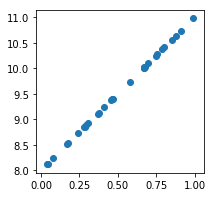

In [27]:
a = 3.
b = 8.

n = 30
x = random(n)
y = lin(a, b, x)
print("x: {}".format(x))
print("\ny: {}".format(y))
plt.scatter(x,y)

In [28]:
def sse(y, y_pred): return ((y - y_pred)**2).sum()

def loss(y, a, b, x): return sse(y, lin(a,b,x))

def avg_loss(y, a, b, x): return np.sqrt(loss(y, a, b, x)/n)

In [29]:
a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

9.0857

In [30]:
lr = 0.01

In [31]:
#In practice, everybody does Calculus online by http://www.wolframalpha.com/
# assume a*x+b = y_pred
### count d[ (y-y_pred)**2, b ]: d[ (y-(a*x+b))**2, b ] = 2 (b + a x - y) = 2 (y_pred - y)
### count d[ (y-y_pred)**2, a ]: d[ (y-(a*x+b))**2, a ] = 2 x (b + a x - y) = x * dy/db

In [32]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [33]:
print(animation.writers.list())

['ffmpeg', 'ffmpeg_file', 'html']


In [34]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10): upd()
    return line, 

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani